# Basic Artificial Neural Networks - ANNs

## Keras Syntax Basics - Part One - Preparing the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('@Source/DATA/fake_reg.csv')
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


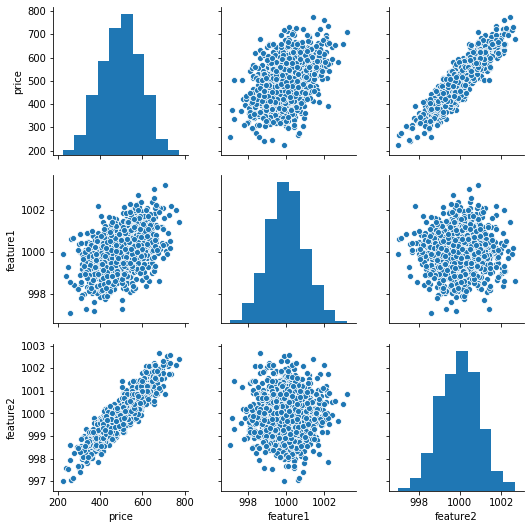

In [3]:
sns.pairplot(df)

In [4]:
from sklearn.model_selection import train_test_split

X = df[['feature1', 'feature2']].values
y=df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

## Keras Syntax Basics - Part Two - Creating and Training the Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Way no. 1

model=Sequential([Dense(4, activation='relu'),
                 Dense(2, activation='relu'),
                 Dense(1)])


# Way no. 2 (prefered)

model=Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))


model.compile(optimizer='rmsprop', loss='mse')
model.fit(X_train, y_train, epochs=250, verbose=1)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 2ms/sample - loss: 256597.4879
Epoch 2/250
700/700 [==============================] - 0s 61us/sample - loss: 256500.4617
Epoch 3/250
700/700 [==============================] - 0s 63us/sample - loss: 256400.2282
Epoch 4/250
700/700 [==============================] - 0s 70us/sample - loss: 256287.0866
Epoch 5/250
700/700 [==============================] - 0s 71us/sample - loss: 256159.7229
Epoch 6/250
700/700 [==============================] - 0s 89us/sample - loss: 256016.8179
Epoch 7/250
700/700 [==============================] - 0s 81us/sample - loss: 255857.5987
Epoch 8/250
700/700 [==============================] - 0s 64us/sample - loss: 255680.3162
Epoch 9/250
700/700 [==============================] - 0s 61us/sample - loss: 255483.6679
Epoch 10/250
700/700 [==============================] - 0s 77us/sample - loss: 255267.3421
Epoch 11/250
700/700 [==============================] - 0s 69us/sample - loss: 

700/700 [==============================] - 0s 60us/sample - loss: 46622.2603
Epoch 92/250
700/700 [==============================] - 0s 57us/sample - loss: 42271.4998
Epoch 93/250
700/700 [==============================] - 0s 67us/sample - loss: 38051.4333
Epoch 94/250
700/700 [==============================] - 0s 57us/sample - loss: 33969.3419
Epoch 95/250
700/700 [==============================] - 0s 57us/sample - loss: 30059.1052
Epoch 96/250
700/700 [==============================] - 0s 60us/sample - loss: 26310.4293
Epoch 97/250
700/700 [==============================] - 0s 64us/sample - loss: 22726.6727
Epoch 98/250
700/700 [==============================] - 0s 63us/sample - loss: 19365.5430
Epoch 99/250
700/700 [==============================] - 0s 61us/sample - loss: 16245.4548
Epoch 100/250
700/700 [==============================] - 0s 61us/sample - loss: 13373.5836
Epoch 101/250
700/700 [==============================] - 0s 66us/sample - loss: 10769.1651
Epoch 102/250
700/700

700/700 [==============================] - 0s 84us/sample - loss: 249.1765
Epoch 183/250
700/700 [==============================] - 0s 81us/sample - loss: 240.8860
Epoch 184/250
700/700 [==============================] - 0s 77us/sample - loss: 230.6425
Epoch 185/250
700/700 [==============================] - 0s 93us/sample - loss: 221.0681
Epoch 186/250
700/700 [==============================] - 0s 89us/sample - loss: 211.9251
Epoch 187/250
700/700 [==============================] - 0s 74us/sample - loss: 202.3194
Epoch 188/250
700/700 [==============================] - 0s 73us/sample - loss: 194.2512
Epoch 189/250
700/700 [==============================] - 0s 84us/sample - loss: 187.3237
Epoch 190/250
700/700 [==============================] - 0s 100us/sample - loss: 178.5405
Epoch 191/250
700/700 [==============================] - 0s 90us/sample - loss: 170.6321
Epoch 192/250
700/700 [==============================] - 0s 84us/sample - loss: 163.1744
Epoch 193/250
700/700 [===========

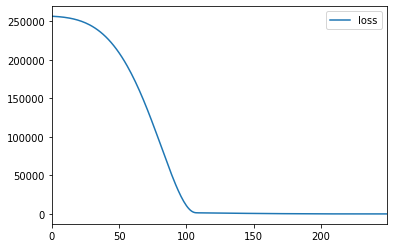

In [7]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()

## Keras Syntax Basics - Part Three - Model Evaluation


In [8]:
model.evaluate(X_test, y_test, verbose=0)

25.744557291666666

In [9]:
model.evaluate(X_train, y_train, verbose=0)

24.03079691205706

In [10]:
test_predictions=model.predict(X_test)

test_predictions=pd.Series(test_predictions.reshape(300,))
pred_df=pd.DataFrame(y_test, columns=['Test True Y'])
pred_df=pd.concat([pred_df, test_predictions], axis=1)

pred_df.columns=['Test True Y', 'Model Prediction']

pred_df

,Test True Y,Model Prediction
0,402.296319,406.208374
1,624.156198,623.894592
2,582.455066,592.454956
3,578.588606,572.971558
4,371.224104,368.128235
...,...,...
295,525.704657,529.864075
296,502.909473,516.770996
297,612.727910,609.986572
298,417.569725,417.611725


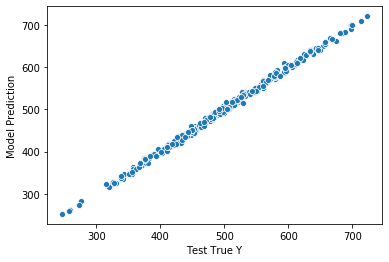

In [11]:
sns.scatterplot(data=pred_df, x='Test True Y', y='Model Prediction')

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE: ',mean_absolute_error(pred_df['Test True Y'], pred_df['Model Prediction']))
print('MSE: ',mean_squared_error(pred_df['Test True Y'], pred_df['Model Prediction']))

MAE:  4.105353271324739
MSE:  25.74456056724519


In [13]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [14]:
new_gem=[[998, 1000]]

new_gem=scaler.transform(new_gem)

price=model.predict(new_gem)
price

array([[421.02646]], dtype=float32)

In [15]:
from tensorflow.keras.models import load_model

model.save("my_gem_model.h5")


later_model=load_model("my_gem_model.h5")
later_model.predict(new_gem)

array([[421.02646]], dtype=float32)

## Keras Regression Code Along - Exploratory Data Analysis

In [16]:
df=pd.read_csv('@Source/DATA/kc_house_data.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


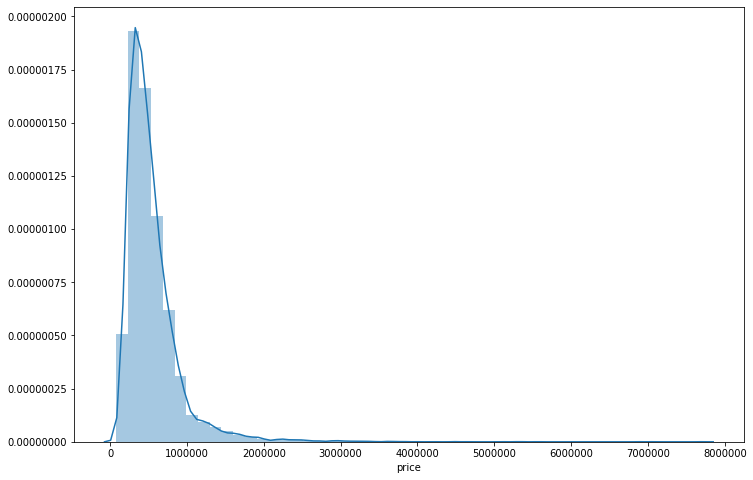

In [19]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

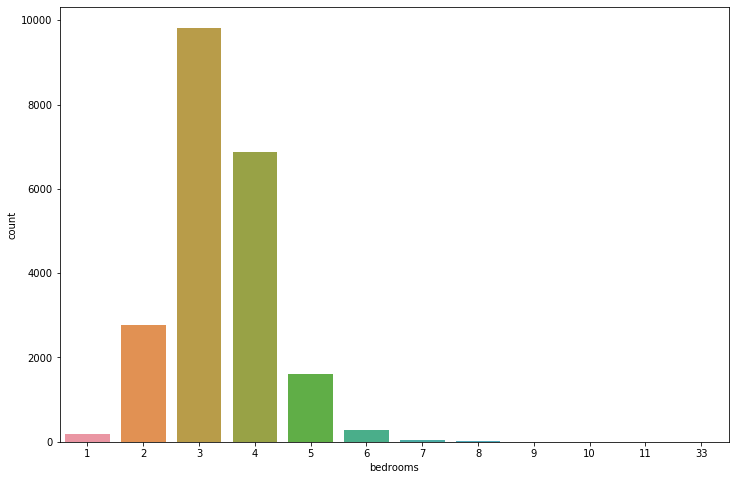

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(df['bedrooms'])

In [21]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

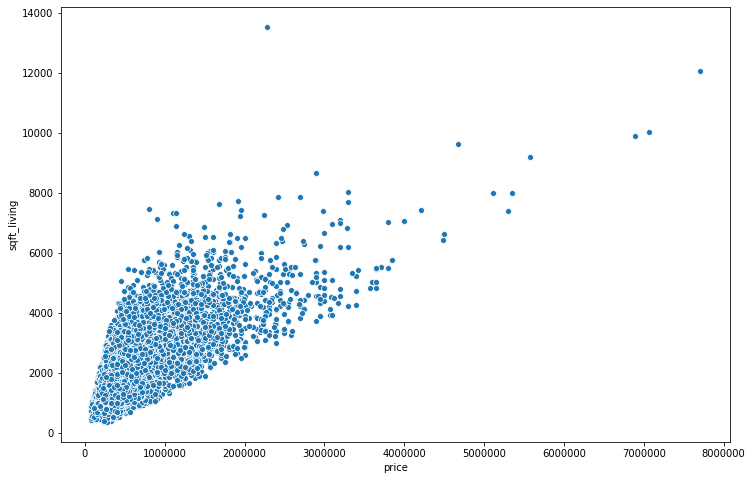

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='sqft_living', data=df)

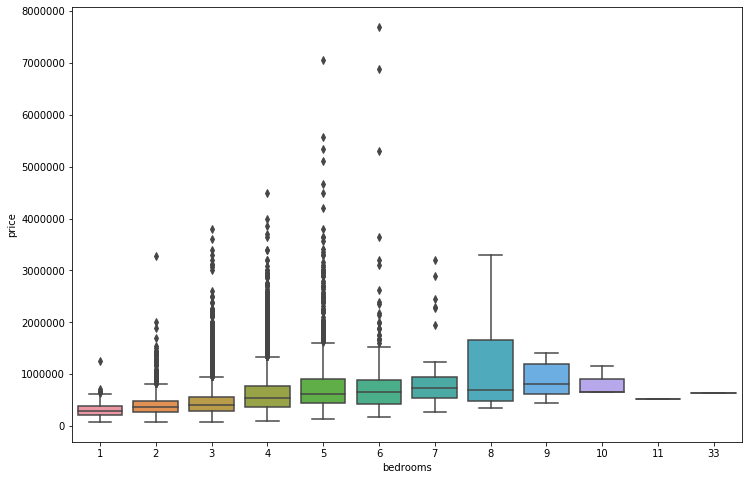

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms', y='price', data=df)

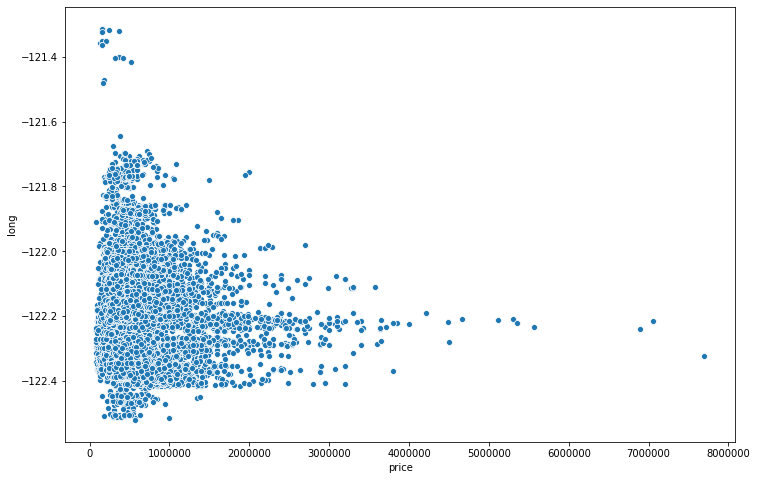

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='long', data=df)

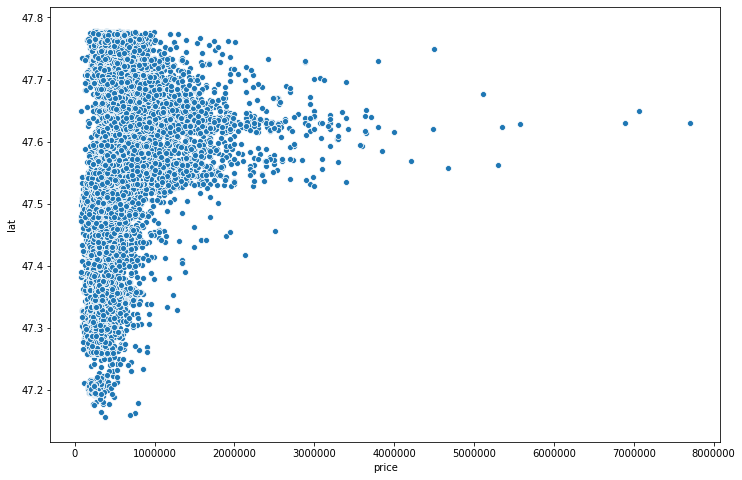

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='lat', data=df)

In [26]:
len(df)*0.01

215.97

In [27]:
#remove 1%
non_top_1_perc=df.sort_values('price', ascending=False).iloc[216:]

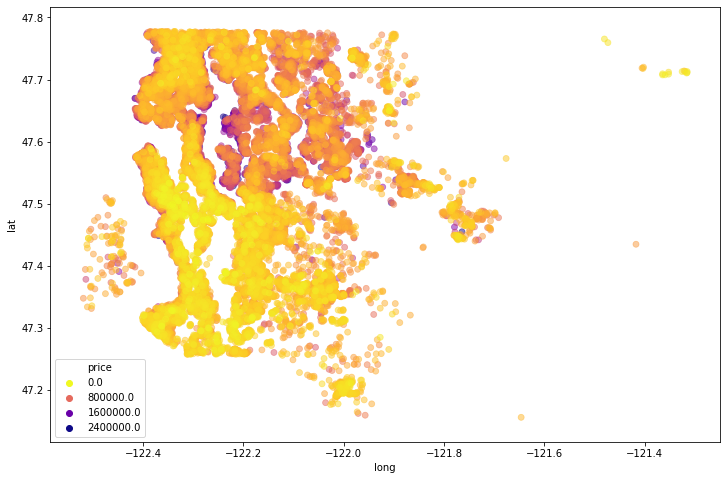

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, hue='price', palette='plasma_r', edgecolor=None, alpha=0.5)

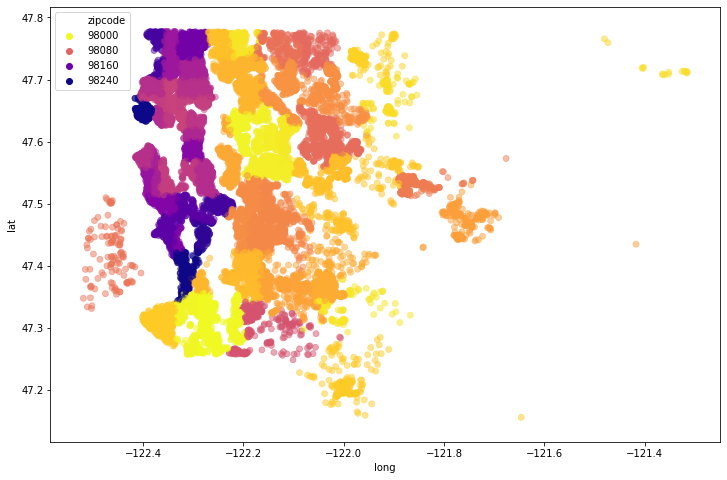

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, hue='zipcode', palette='plasma_r', edgecolor=None, alpha=0.5)

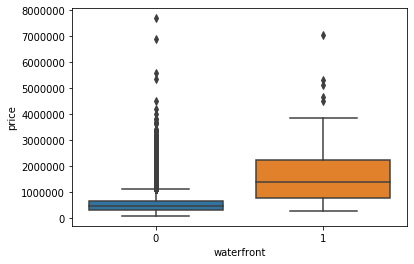

In [30]:
sns.boxplot(x='waterfront', y='price', data=df)

## Keras Regression Code Along - Exploratory Data Analysis - Continued


In [31]:
df=df.drop('id', axis=1)

In [32]:
df['date']=pd.to_datetime(df['date'])

In [33]:
df['year']=df['date'].apply(lambda date: date.year)
df['month']=df['date'].apply(lambda date: date.month)

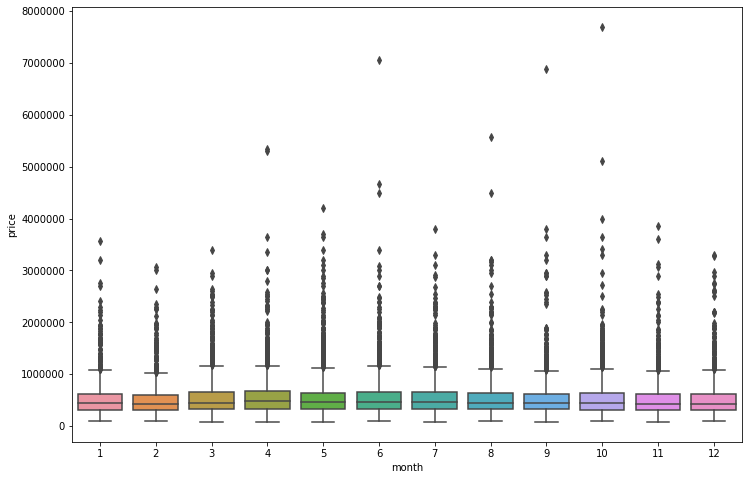

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(x='month', y='price', data=df)

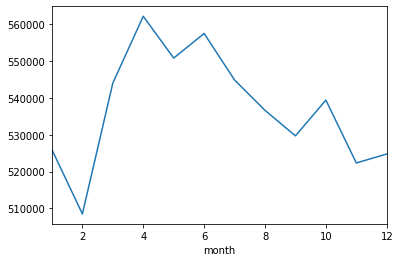

In [35]:
df.groupby('month').mean()['price'].plot()

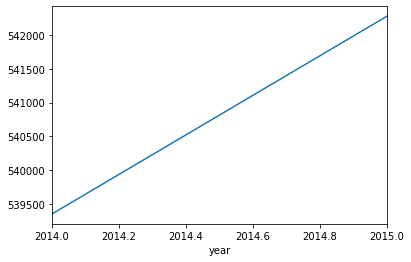

In [36]:
df.groupby('year').mean()['price'].plot()

In [37]:
df=df.drop('date', axis=1)

In [38]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [39]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [40]:
df=df.drop('zipcode', axis=1)

In [41]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [42]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Keras Regression Code Along - Data Preprocessing and Creating a Model

In [43]:
X=df.drop('price', axis=1).values
y=df['price'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [62]:
X_train.shape

(15117, 19)

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 64us/sample - loss: 430246679150.9215 - val_loss: 418958856748.2469
Epoch 2/400
15117/15117 [==============================] - 0s 23us/sample - loss: 429899549944.8028 - val_loss: 417817489539.4766
Epoch 3/400
15117/15117 [==============================] - 0s 22us/sample - loss: 425591350424.4789 - val_loss: 408095916921.9951
Epoch 4/400
15117/15117 [==============================] - 0s 21us/sample - loss: 403708903313.4511 - val_loss: 369868719900.4445
Epoch 5/400
15117/15117 [==============================] - 0s 22us/sample - loss: 340471750212.1786 - val_loss: 280627601225.9556
Epoch 6/400
15117/15117 [==============================] - 0s 22us/sample - loss: 230035367037.3836 - val_loss: 163336280089.2839
Epoch 7/400
15117/15117 [==============================] - 0s 22us/sample - loss: 132172021140.3300 - val_loss: 102750817494.9136
Epoch 8/400
15117/15117 [================

15117/15117 [==============================] - 0s 23us/sample - loss: 40673032537.8718 - val_loss: 39335278111.6049
Epoch 65/400
15117/15117 [==============================] - 0s 23us/sample - loss: 40382770057.6612 - val_loss: 39106861839.8025
Epoch 66/400
15117/15117 [==============================] - 0s 22us/sample - loss: 40121494552.4535 - val_loss: 38738851460.7407
Epoch 67/400
15117/15117 [==============================] - 0s 23us/sample - loss: 39796221837.7932 - val_loss: 38420944997.1358
Epoch 68/400
15117/15117 [==============================] - 0s 23us/sample - loss: 39506973000.2598 - val_loss: 38138027587.0025
Epoch 69/400
15117/15117 [==============================] - 0s 23us/sample - loss: 39256741307.3472 - val_loss: 37871040178.2519
Epoch 70/400
15117/15117 [==============================] - 0s 22us/sample - loss: 38978097111.8989 - val_loss: 37630794896.1185
Epoch 71/400
15117/15117 [==============================] - 0s 22us/sample - loss: 38736133790.6770 - val_loss

15117/15117 [==============================] - 0s 21us/sample - loss: 34048078907.5420 - val_loss: 32747529557.3333
Epoch 128/400
15117/15117 [==============================] - 0s 22us/sample - loss: 34024657856.2583 - val_loss: 32735709679.5654
Epoch 129/400
15117/15117 [==============================] - 0s 25us/sample - loss: 34029467837.8027 - val_loss: 32648490709.6494
Epoch 130/400
15117/15117 [==============================] - 0s 23us/sample - loss: 33960968772.2125 - val_loss: 32606054809.6000
Epoch 131/400
15117/15117 [==============================] - 0s 23us/sample - loss: 33911967612.0458 - val_loss: 32616347921.0667
Epoch 132/400
15117/15117 [==============================] - 0s 22us/sample - loss: 33867628696.0048 - val_loss: 32597812701.8667
Epoch 133/400
15117/15117 [==============================] - 0s 23us/sample - loss: 33826297785.6876 - val_loss: 32504998343.1111
Epoch 134/400
15117/15117 [==============================] - 0s 22us/sample - loss: 33819784778.9524 - v

Epoch 190/400
15117/15117 [==============================] - 0s 25us/sample - loss: 32298318071.4480 - val_loss: 30667231808.4741
Epoch 191/400
15117/15117 [==============================] - 0s 23us/sample - loss: 32297657365.0666 - val_loss: 30672065048.0198
Epoch 192/400
15117/15117 [==============================] - 1s 34us/sample - loss: 32298414327.3803 - val_loss: 30591806658.6864
Epoch 193/400
15117/15117 [==============================] - 0s 32us/sample - loss: 32275428314.8117 - val_loss: 30557611389.7877
Epoch 194/400
15117/15117 [==============================] - 0s 22us/sample - loss: 32218142891.3102 - val_loss: 30476078957.3531
Epoch 195/400
15117/15117 [==============================] - 0s 22us/sample - loss: 32210940917.6360 - val_loss: 30418079607.4667
Epoch 196/400
15117/15117 [==============================] - 0s 26us/sample - loss: 32192774671.9862 - val_loss: 30395064057.0469
Epoch 197/400
15117/15117 [==============================] - 0s 28us/sample - loss: 321742

15117/15117 [==============================] - 0s 24us/sample - loss: 31279123229.8218 - val_loss: 29348579919.6444
Epoch 254/400
15117/15117 [==============================] - 0s 29us/sample - loss: 31285865241.4865 - val_loss: 29333963186.8839
Epoch 255/400
15117/15117 [==============================] - 0s 24us/sample - loss: 31246162233.3574 - val_loss: 29297654634.8247
Epoch 256/400
15117/15117 [==============================] - 1s 52us/sample - loss: 31241492907.2594 - val_loss: 29318275016.3753
Epoch 257/400
15117/15117 [==============================] - 0s 33us/sample - loss: 31240597158.5346 - val_loss: 29309953112.4938
Epoch 258/400
15117/15117 [==============================] - 0s 22us/sample - loss: 31262186420.4718 - val_loss: 29398112028.4444
Epoch 259/400
15117/15117 [==============================] - 0s 22us/sample - loss: 31189659153.3749 - val_loss: 29255259927.3877
Epoch 260/400
15117/15117 [==============================] - 0s 22us/sample - loss: 31255763309.2450 - v

Epoch 316/400
15117/15117 [==============================] - 0s 24us/sample - loss: 30657478322.1856 - val_loss: 28664729397.7284
Epoch 317/400
15117/15117 [==============================] - 0s 22us/sample - loss: 30618125694.7892 - val_loss: 28608377721.9951
Epoch 318/400
15117/15117 [==============================] - 0s 24us/sample - loss: 30601478188.9782 - val_loss: 28553072164.6617
Epoch 319/400
15117/15117 [==============================] - 0s 25us/sample - loss: 30607356169.1277 - val_loss: 28608113691.8124
Epoch 320/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30553205969.2436 - val_loss: 28521628042.4296
Epoch 321/400
15117/15117 [==============================] - 0s 32us/sample - loss: 30613622108.6491 - val_loss: 28470408523.2198
Epoch 322/400
15117/15117 [==============================] - 0s 27us/sample - loss: 30582870356.3850 - val_loss: 28521276307.2790
Epoch 323/400
15117/15117 [==============================] - 0s 25us/sample - loss: 305495

15117/15117 [==============================] - 0s 25us/sample - loss: 29874518018.7773 - val_loss: 27768417333.0963
Epoch 380/400
15117/15117 [==============================] - 0s 26us/sample - loss: 29895921539.3615 - val_loss: 27721812842.8247
Epoch 381/400
15117/15117 [==============================] - 0s 22us/sample - loss: 29870450167.6343 - val_loss: 27618737771.4568
Epoch 382/400
15117/15117 [==============================] - 0s 23us/sample - loss: 29862184893.2439 - val_loss: 27641588030.5778
Epoch 383/400
15117/15117 [==============================] - 0s 32us/sample - loss: 29844060910.1340 - val_loss: 27791351084.8790
Epoch 384/400
15117/15117 [==============================] - 0s 24us/sample - loss: 29862199382.4341 - val_loss: 27585090855.8222
Epoch 385/400
15117/15117 [==============================] - 0s 25us/sample - loss: 29748839170.3200 - val_loss: 27557454698.8247
Epoch 386/400
15117/15117 [==============================] - 0s 28us/sample - loss: 29810870656.6181 - v

## Keras Regression Code Along - Model Evaluation and Predictions

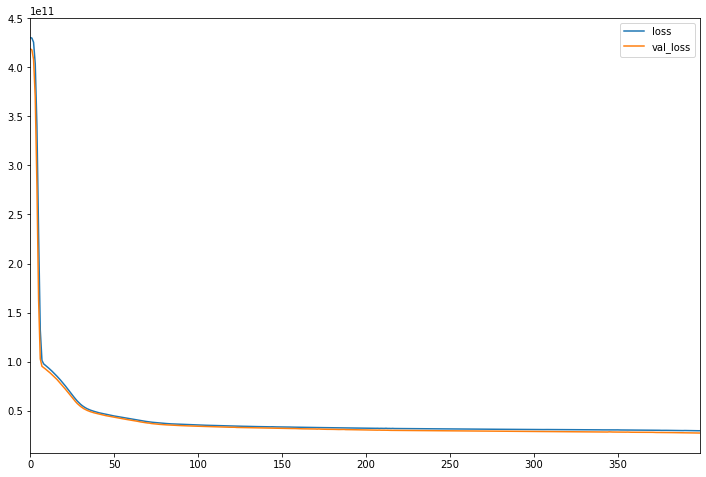

In [64]:
losses=pd.DataFrame(model.history.history)
losses.plot(figsize=(12,8))

In [65]:
predictions=model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

print('MSE: ', mean_squared_error(y_test, predictions))
print('RMSE: ',   mean_squared_error(y_test, predictions)**0.5)
print('MAE: ', mean_absolute_error(y_test, predictions))

MSE:  27157510600.345303
RMSE:  164795.35976581776
MAE:  99792.70223162616


In [66]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [67]:
5.402966e+05

540296.6

In [68]:
explained_variance_score(y_test, predictions)

0.7952473205932233

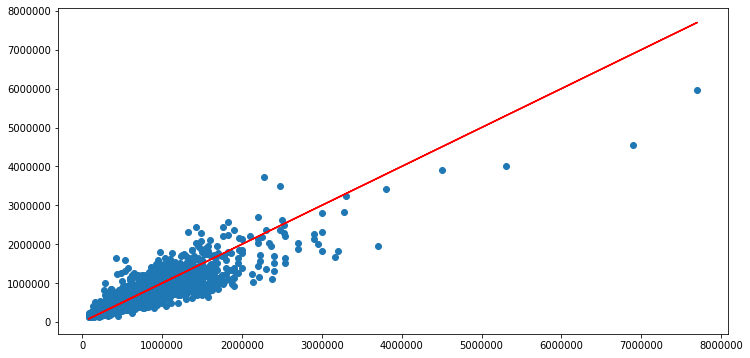

In [69]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [70]:
new_house=df.drop('price', axis=1).iloc[0]
print(new_house)
new_house_price=df['price'].iloc[0]
print('\n\nPrice: ', new_house_price)

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64


Price:  221900.0


In [71]:
new_house=scaler.transform(new_house.values.reshape(-1, 19))
model.predict(new_house)

array([[285645.8]], dtype=float32)

## Keras Classification Code Along - EDA and Preprocessing

In [79]:
df=pd.read_csv('@Source/DATA/cancer_classification.csv')

In [80]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


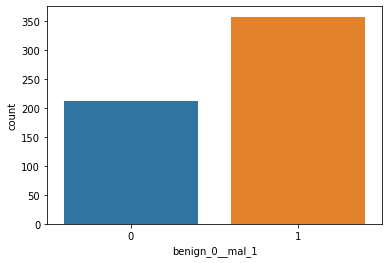

In [82]:
sns.countplot(x='benign_0__mal_1', data=df)

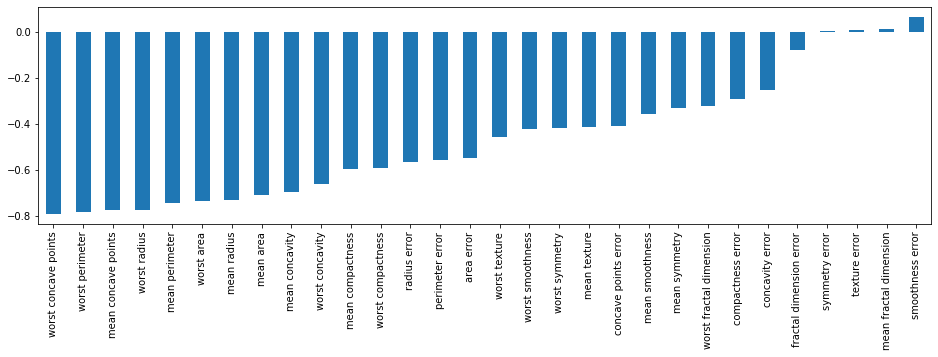

In [88]:
plt.figure(figsize=(16,4))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

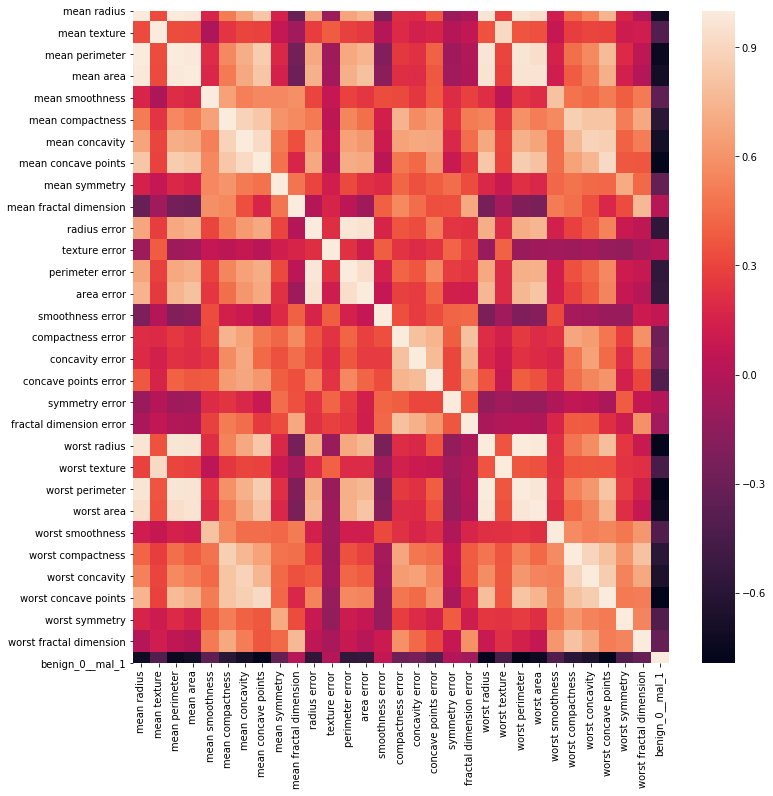

In [90]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [96]:
X=df.drop('benign_0__mal_1', axis=1).values
y=df['benign_0__mal_1'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Keras Classification - Dealing with Overfitting and Evaluation

In [97]:
X_train.shape

(426, 30)

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model=Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5)) #switch off 5-% of neurons
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
#BINARY Classification - last layer - sigmoid
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6879 - val_loss: 0.6509
Epoch 2/600
426/426 [==============================] - 0s 134us/sample - loss: 0.6572 - val_loss: 0.6290
Epoch 3/600
426/426 [==============================] - 0s 127us/sample - loss: 0.6357 - val_loss: 0.6059
Epoch 4/600
426/426 [==============================] - 0s 129us/sample - loss: 0.6401 - val_loss: 0.5799
Epoch 5/600
426/426 [==============================] - 0s 129us/sample - loss: 0.6058 - val_loss: 0.5517
Epoch 6/600
426/426 [==============================] - 0s 134us/sample - loss: 0.5764 - val_loss: 0.5211
Epoch 7/600
426/426 [==============================] - 0s 127us/sample - loss: 0.5661 - val_loss: 0.4947
Epoch 8/600
426/426 [==============================] - 0s 122us/sample - loss: 0.5490 - val_loss: 0.4691
Epoch 9/600
426/426 [==============================] - 0s 132us/sample - loss: 0.5067 - val_loss: 0.4438
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 120us/sample - loss: 0.1063 - val_loss: 0.0759
Epoch 79/600
426/426 [==============================] - 0s 127us/sample - loss: 0.1148 - val_loss: 0.0755
Epoch 80/600
426/426 [==============================] - 0s 131us/sample - loss: 0.1025 - val_loss: 0.0759
Epoch 81/600
426/426 [==============================] - 0s 141us/sample - loss: 0.1172 - val_loss: 0.0812
Epoch 82/600
426/426 [==============================] - 0s 141us/sample - loss: 0.1158 - val_loss: 0.0898
Epoch 83/600
426/426 [==============================] - 0s 143us/sample - loss: 0.1235 - val_loss: 0.0767
Epoch 84/600
426/426 [==============================] - 0s 122us/sample - loss: 0.1008 - val_loss: 0.0814
Epoch 85/600
426/426 [==============================] - 0s 124us/sample - loss: 0.1093 - val_loss: 0.0737
Epoch 86/600
426/426 [==============================] - 0s 136us/sample - loss: 0.1177 - val_loss: 0.0720
Epoch 87/600
426/426 [========================

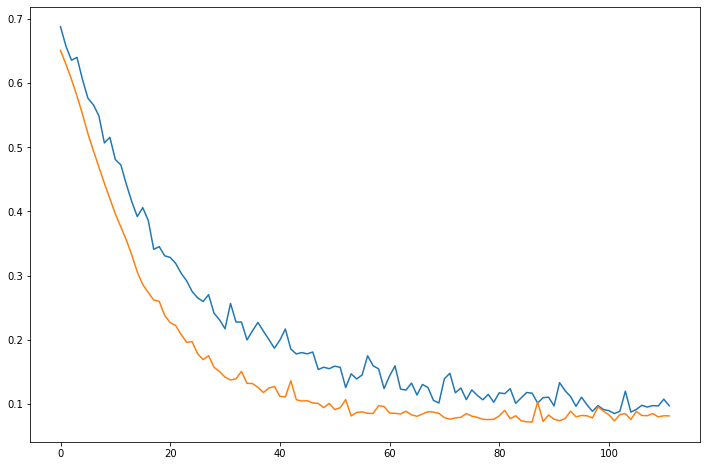

In [106]:
losses=pd.DataFrame(model.history.history)
plt.figure(figsize=(12,8))
plt.plot(losses)

In [108]:
predictions=model.predict_classes(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[54  1]
 [ 3 85]]


## Keras Project Solutions - Exploratory Data Analysis

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('@Source/DATA/lending_club_loan_two.csv')
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [117]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


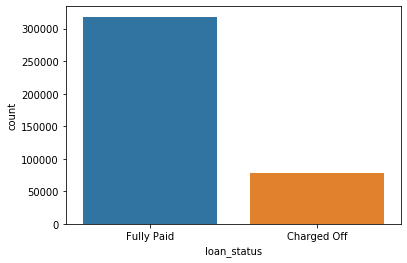

In [120]:
sns.countplot(df['loan_status'])

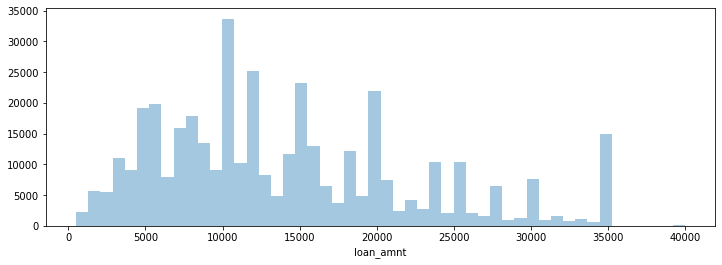

In [123]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'], kde=False)

(12.0, 0.0)

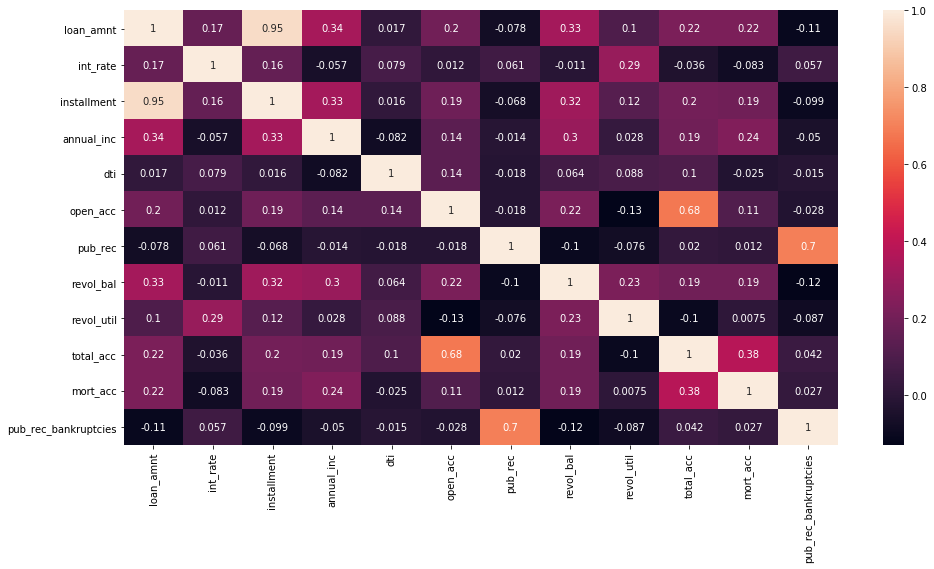

In [131]:
plt.figure(figsize=(16,8))
ax=sns.heatmap(df.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)